In [1]:
import control

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num = np.array([1])
den = np.array([1, 0.8, 1])

gs = control.TransferFunction(num, den)
gs

TransferFunction(array([1]), array([1. , 0.8, 1. ]))

In [4]:
yT , T = control.step_response(gs)

In [5]:
control.step_info(gs)

{'RiseTime': 1.5699443815868492,
 'SettlingTime': 8.54747496641729,
 'SettlingMin': 0.9356617613694419,
 'SettlingMax': 1.2533621089794214,
 'Overshoot': 25.336210897942134,
 'Undershoot': 0,
 'Peak': 1.2533621089794214,
 'PeakTime': 3.488765292415221,
 'SteadyStateValue': 1.0}

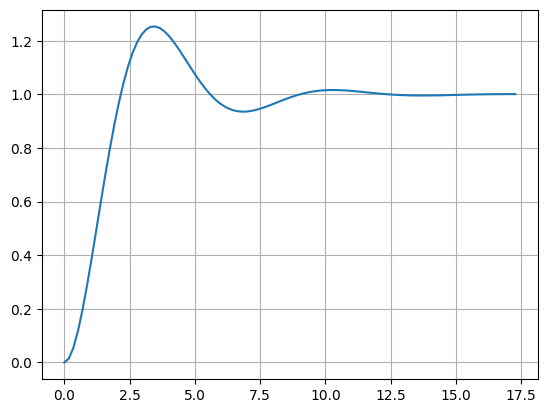

In [6]:
plt.plot(yT, T)
plt.grid()

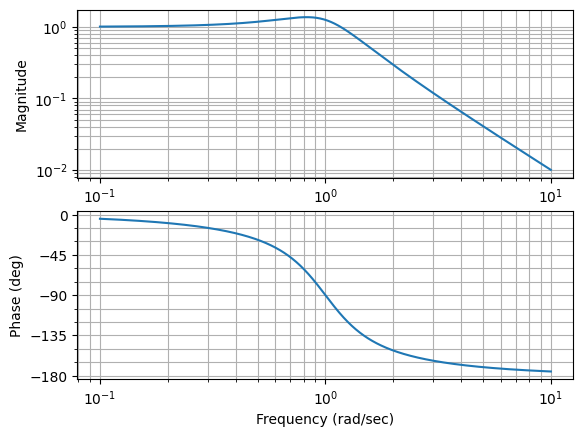

In [7]:
(mag, phase, w) = control.bode_plot(gs)

In [8]:
#1 rad/s = 0.159155 Hz

#Freq ganho unitário, 1.1662 -> figura bode_ganUn.png

freqS = 10*(1.1662*0.159155)
freqS
Ts = 1/freqS

print("Frequência escolhida: " + str(freqS) + " Hz Periodo de amostragem: "+ str(Ts) + " s")

Frequência escolhida: 1.8560656099999997 Hz Periodo de amostragem: 0.5387740576692223 s


In [9]:
gz = control.sample_system(gs, Ts, method = 'zoh')
gz           

TransferFunction(array([0.12341497, 0.10677001]), array([ 1.        , -1.41966142,  0.6498464 ]), 0.5387740576692223)

In [10]:
gz2 = control.sample_system(gs, Ts, method = 'tustin')
gz2

TransferFunction(array([0.05633922, 0.11267845, 0.05633922]), array([ 1.        , -1.44002135,  0.66537825]), 0.5387740576692223)

In [11]:
#Feito a mao
from scipy import signal
residues = signal.residue([1],[1, 0.8 ,1,0])
residues

(array([ 1. +0.j        , -0.5+0.21821789j, -0.5-0.21821789j]),
 array([ 0. +0.j        , -0.4+0.91651514j, -0.4-0.91651514j]),
 array([], dtype=float64))

In [12]:
#Mostrando o sinal obtido
import sympy
from sympy import Symbol
import cmath

In [13]:
z = Symbol('z')
e = Symbol('e')

In [14]:
Gz1 = 1 - ((z-1)*(residues[0][1]))/(z-e**((residues[1][1])*Ts)) - ((z-1)*(residues[0][2]))/(z-e**((residues[1][2])*Ts))
Gz1

1 - (-0.5 + 0.218217890235992*I)*(z - 1)/(-e**(-0.215509623067689 + 0.493794580349543*I) + z) - (-0.5 - 0.218217890235992*I)*(z - 1)/(-e**(-0.215509623067689 - 0.493794580349543*I) + z)

In [15]:
z1 = control.TransferFunction.z
Gz2 = 1 - ((z1-1)*(residues[0][1]))/(z1-cmath.exp((residues[1][1])*Ts)) - ((z1-1)*(residues[0][2]))/(z1-cmath.exp((residues[1][2])*Ts))
Gz2

TransferFunction(array([ 2.        +0.00000000e+00j, -2.96273782+0.00000000e+00j,
        1.1929228 -5.55111512e-17j]), array([ 1.        +0.j, -1.41966142+0.j,  0.6498464 +0.j]), True)

In [16]:
yout1, T1 = control.step_response(gz)

In [17]:
yout3, T3 = control.step_response(gz2)

In [29]:
yout1

array([ 0.        ,  0.53877406,  1.07754812,  1.61632217,  2.15509623,
        2.69387029,  3.23264435,  3.7714184 ,  4.31019246,  4.84896652,
        5.38774058,  5.92651463,  6.46528869,  7.00406275,  7.54283681,
        8.08161087,  8.62038492,  9.15915898,  9.69793304, 10.2367071 ,
       10.77548115, 11.31425521, 11.85302927, 12.39180333, 12.93057738,
       13.46935144, 14.0081255 , 14.54689956, 15.08567361, 15.62444767,
       16.16322173, 16.70199579, 17.24076985, 17.7795439 ])

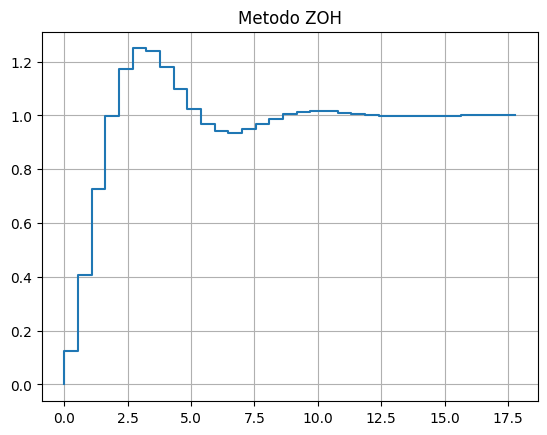

In [30]:
plt.title("Metodo ZOH")
plt.grid()
#plt.plot(yout1, T1)
plt.step(yout1, T1)

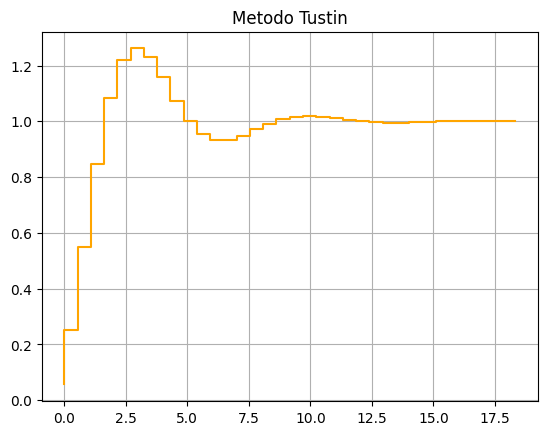

In [31]:
plt.title("Metodo Tustin")
plt.grid()
#plt.plot(yout3, T3, color =  'orange')
plt.step(yout3, T3, color =  'orange')

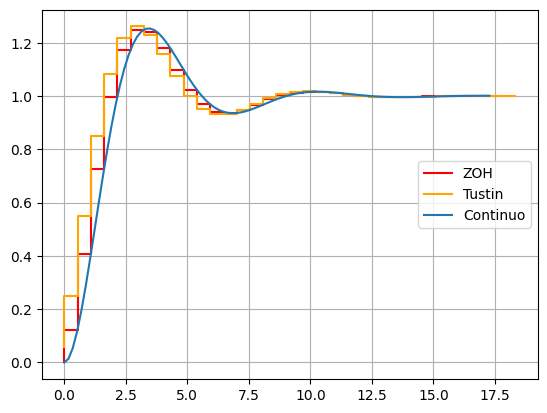

In [42]:
plt.figure(0)
plt.grid()
plt.step(yout1, T1, 'r', label = "ZOH")
plt.step(yout3, T3, color =  'orange', label = "Tustin")
plt.plot(yT, T, label = "Continuo")
plt.legend(loc = 'right')
plt.show()